<a href="https://colab.research.google.com/github/Zainab99687289/21F21769/blob/main/Men%26women_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#My dataset is available in googledrive; so I am accessing my drive from colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
#Once this is executed, you will see your drive appearing on the left hand side

Mounted at /content/drive


In [2]:
# Define paths to the dataset
train_dir = '/content/drive/MyDrive/Men and women classification/traindata'  # Update with your actual path
test_dir = '/content/drive/MyDrive/Men and women classification/testdata/testdata'    # Update with your actual path

In [3]:
import os
print(len(os.listdir('/content/drive/MyDrive/Men and women classification/traindata/traindata/men')))
print(len(os.listdir('/content/drive/MyDrive/Men and women classification/traindata/traindata/women')))
print(len(os.listdir('/content/drive/MyDrive/Men and women classification/testdata/testdata/men')))
print(len(os.listdir('/content/drive/MyDrive/Men and women classification/testdata/testdata/women')))

1000
1912
82
100


In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split 20% of the images for validation
)

# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  # 'binary' for binary classification (cats vs. dogs)
    subset='training'  # Specify 'training' for the training set
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Note: Using the same validation split as in the training set
)

# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Specify 'validation' for the validation set
)

Found 2313 images belonging to 1 classes.
Found 578 images belonging to 1 classes.


In [5]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout

In [6]:
# create CNN model - custom-made

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))  #output layer

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [8]:
history = model.fit(train_data, epochs=20, validation_data=validation_data)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 1913s 26s/step - accuracy: 0.9359 - loss: 0.0487 - val_accuracy: 1.0000 - val_loss: 7.9058e-34
Epoch 2/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 488s 6s/step - accuracy: 1.0000 - loss: 1.1958e-19 - val_accuracy: 1.0000 - val_loss: 6.8644e-34
Epoch 3/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 490s 6s/step - accuracy: 1.0000 - loss: 1.3686e-19 - val_accuracy: 1.0000 - val_loss: 6.8642e-34
Epoch 4/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 489s 6s/step - accuracy: 1.0000 - loss: 1.6790e-21 - val_accuracy: 1.0000 - val_loss: 6.8642e-34
Epoch 5/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 446s 6s/step - accuracy: 1.0000 - loss: 6.5962e-20 - val_accuracy: 1.0000 - val_loss: 6.8642e-34
Epoch 6/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 435s 6s/step - accuracy: 1.0000 - loss: 1.9764e-19 - val_accuracy: 1.0000 - val_loss: 6.8642e-34
Epoch 7/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 456s 6s/step - accuracy: 1.0000 - loss: 1.3686e-19 - val_accuracy: 1.0000 - val_loss: 6.8642e-34
Epoch 8/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 432s 6s/step - accu

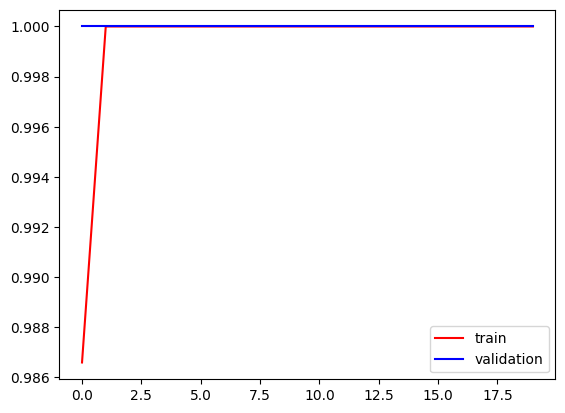

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

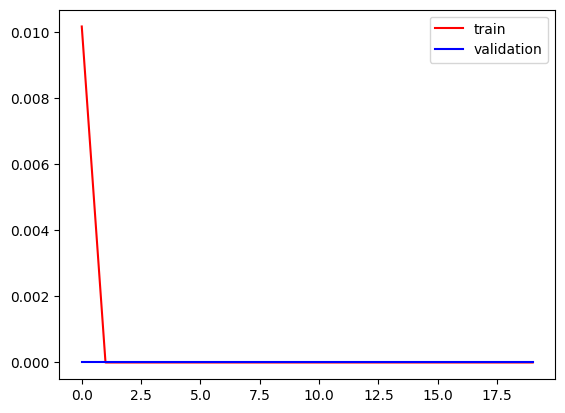

In [10]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [11]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 181 images belonging to 2 classes.


In [12]:
#predict the test data
predictions = model.predict(test_data)

6/6 ━━━━━━━━━━━━━━━━━━━━ 37s 6s/step


In [13]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[82  0]
 [99  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.45      1.00      0.62        82
           1       0.00      0.00      0.00        99

    accuracy                           0.45       181
   macro avg       0.23      0.50      0.31       181
weighted avg       0.21      0.45      0.28       181



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [14]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(1,activation='sigmoid'))  #output layer

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [16]:
history = model.fit(train_data, epochs=20, validation_data=validation_data)

Epoch 1/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 711s 10s/step - accuracy: 0.9348 - loss: 0.4652 - val_accuracy: 1.0000 - val_loss: 1.5758e-37
Epoch 2/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 642s 9s/step - accuracy: 0.9991 - loss: 0.0281 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 665s 9s/step - accuracy: 1.0000 - loss: 1.1893e-22 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 648s 9s/step - accuracy: 1.0000 - loss: 1.0714e-19 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 650s 9s/step - accuracy: 1.0000 - loss: 3.1042e-13 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 688s 9s/step - accuracy: 1.0000 - loss: 4.1756e-14 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 683s 9s/step - accuracy: 1.0000 - loss: 5.6019e-31 - val_accuracy: 1.0000 - val_loss: 1.1242e-28
Epoch 8/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 652s 9s/step - accuracy:

In [17]:
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 181 images belonging to 2 classes.


In [18]:
predictions = model.predict(test_data)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


6/6 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step


In [19]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report after applying techniques to handle overfitting:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[82  0]
 [99  0]]
Classification Report after applying techniques to handle overfitting:
              precision    recall  f1-score   support

           0       0.45      1.00      0.62        82
           1       0.00      0.00      0.00        99

    accuracy                           0.45       181
   macro avg       0.23      0.50      0.31       181
weighted avg       0.21      0.45      0.28       181



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [20]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

resnet_model = Sequential()    #ResNet50 is a pre-trained model
pretrained_model = tf.keras.applications.ResNet50(include_top = False, #because i have my own image of a diff dimension
                                                input_shape = (256,256,3),
                                                pooling = 'max', classes = 2,
                                                weights = 'imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False  #all layers in the Resnet50 is not trainable; keep those weights; I am going to add my own i/p and other layers

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation = 'relu'))
resnet_model.add(Dense(1, activation = 'sigmoid'))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [21]:
from keras.optimizers import Adam
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [22]:
history = resnet_model.fit(train_data, epochs=20, validation_data=validation_data)

Epoch 1/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 872s 12s/step - accuracy: 0.9339 - loss: 0.1125 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 797s 11s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 789s 11s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 795s 11s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 810s 11s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 807s 11s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 803s 11s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 778s 11s/step 

In [23]:
predictions = resnet_model.predict(test_data)

6/6 ━━━━━━━━━━━━━━━━━━━━ 56s 8s/step


In [24]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report after applying techniques to handle overfitting:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[82  0]
 [99  0]]
Classification Report after applying techniques to handle overfitting:
              precision    recall  f1-score   support

           0       0.45      1.00      0.62        82
           1       0.00      0.00      0.00        99

    accuracy                           0.45       181
   macro avg       0.23      0.50      0.31       181
weighted avg       0.21      0.45      0.28       181



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
